In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [5]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [9]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')

Сгруппируйте данные по дате, посчитайте количество продаж

In [11]:
# Группировка по дате и подсчет общего количества продаж
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

# Вывод результата
print(grouped_df)

          Дата  Количество
0   2018-01-04        3734
1   2018-01-05        3643
2   2018-01-06        3193
3   2018-01-07        3298
4   2018-01-09        4055
..         ...         ...
200 2018-08-26        5302
201 2018-08-28        5983
202 2018-08-29        4969
203 2018-08-30        4648
204 2018-08-31        4570

[205 rows x 2 columns]


Вывести несколько первых строк сгруппированных данных

In [13]:
print(grouped_df.head())

        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Нарисуйте график продаж у `grouped_df`

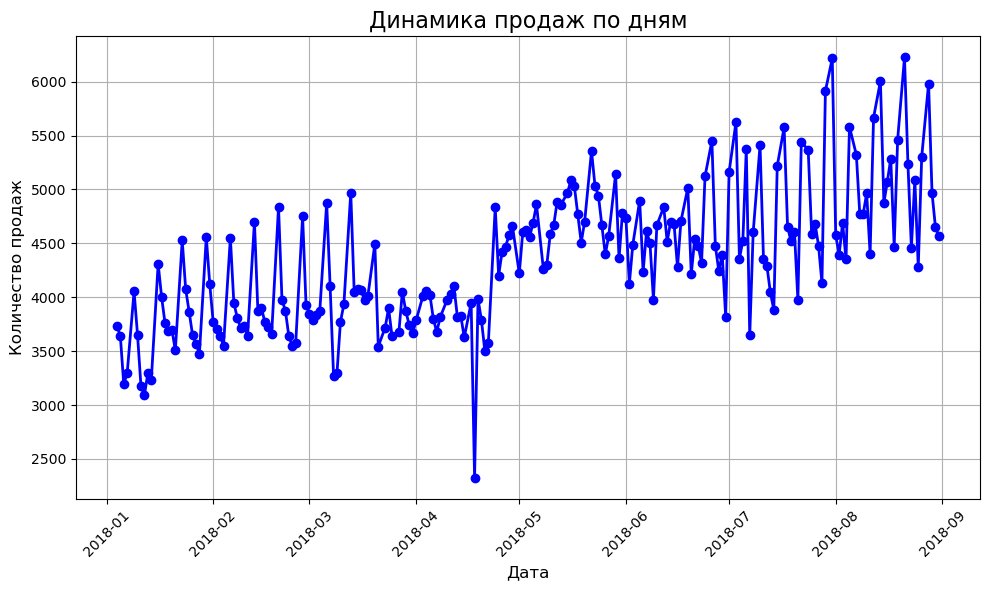

In [15]:
# Построение графика
plt.figure(figsize=(10, 6))  # Размер графика
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o', color='b', linestyle='-', linewidth=2)

# Добавление заголовка и подписей
plt.title('Динамика продаж по дням', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество продаж', fontsize=12)

# Поворот меток на оси X для лучшей читаемости
plt.xticks(rotation=45)

# Отображение сетки
plt.grid(True)

# Показ графика
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
График динамики продаж по дням помогает понять, как изменяются объёмы продаж в течение времени. 
Он может выявить сезонные тренды, пиковые и минимальные значения, а также выявить аномалии в данных, которые могут потребовать
дополнительного анализа или внимания со стороны бизнеса.В зависимости от того, как выглядит линия, можно сделать выводы о поведении покупателей.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [17]:
# Рассчитываем первый (Q1) и третий (Q3) квартиль для столбца 'Количество'
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)

# Рассчитываем IQR (межквартильный размах)
IQR = Q3 - Q1

# Вычисляем границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим строки, которые являются выбросами
outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

# Выводим строку с максимальным выбросом по количеству продаж
max_outlier = outliers.loc[outliers['Количество'].idxmax()]

print("Строка с максимальным выбросом:")
print(max_outlier)

Строка с максимальным выбросом:
Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [19]:
# Фильтруем данные по месяцам (июнь, июль, август)
df['Month'] = df['Дата'].dt.month
df = df[df['Month'].isin([6, 7, 8])]  # Месяцы июнь, июль, август

# Фильтруем данные по дням недели (среда — это 2-й день недели)
df['Weekday'] = df['Дата'].dt.weekday
df = df[df['Weekday'] == 2]  # Среда

# Фильтруем данные по складам (если у нас есть только 3 склада, выбираем их)
df = df[df['Склад'].isin([1, 2, 3])]  # Склад 1, 2 и 3

# Группировка по складу и товару, суммирование по количеству
grouped = df.groupby(['Склад', 'Номенклатура'])['Количество'].sum().reset_index()

# Нахождение топового товара для каждого склада
top_products = grouped.loc[grouped.groupby('Склад')['Количество'].idxmax()]

# Выводим топовые товары по продажам для каждого склада
print(top_products)

    Склад Номенклатура  Количество
1       1    product_1        2981
24      2    product_1        2887
46      3    product_1        2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [29]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [139]:
weather_df = pd.read_csv('weather_data.csv', delimiter='\t', encoding='windows-1251')

In [141]:
import pandas as pd

# Загрузка данных из файла
weather_df = pd.read_csv('weather_data.csv', delimiter='\t', encoding='windows-1251')

# Проверим первые несколько строк
print(weather_df.head())

  Местное время в Астане;T;Po;P;Pa;U;DD;Ff;ff10;ff3;N;WW;W1;W2;Tn;Tx;Cl;Nh;H;Cm;Ch;VV;Td;RRR;tR;E;Tg;E';sss
0  31.08.2024 23:00;11.мар;733.0;764.1;0.0;83;Вет...                                                       
1  31.08.2024 20:00;12.авг;733.0;763.9;0.9;76;Вет...                                                       
2  31.08.2024 17:00;16.июл;732.1;762.7;0.2;66;Вет...                                                       
3  31.08.2024 14:00;15.апр;731.9;762.5;-0.2;69;Ве...                                                       
4  31.08.2024 11:00;16.янв;732.1;762.6;0.0;69;Вет...                                                       


In [143]:
import pandas as pd

# Загрузка данных с использованием точек с запятой в качестве разделителя
weather_df = pd.read_csv('weather_data.csv', delimiter=';', encoding='windows-1251')

# Проверим первые несколько строк
print(weather_df.head())

  Местное время в Астане       T     Po      P    Pa   U  \
0       31.08.2024 23:00  11.мар  733.0  764.1   0.0  83   
1       31.08.2024 20:00  12.авг  733.0  763.9   0.9  76   
2       31.08.2024 17:00  16.июл  732.1  762.7   0.2  66   
3       31.08.2024 14:00  15.апр  731.9  762.5  -0.2  69   
4       31.08.2024 11:00  16.янв  732.1  762.6   0.0  69   

                                      DD  Ff  ff10  ff3  ...  \
0   Ветер, дующий с западо-северо-запада   2   NaN  NaN  ...   
1          Ветер, дующий с северо-запада   1   NaN  NaN  ...   
2   Ветер, дующий с западо-северо-запада   2   NaN  NaN  ...   
3          Ветер, дующий с северо-запада   1   NaN  NaN  ...   
4  Ветер, дующий с северо-северо-востока   1   NaN  NaN  ...   

                                                  Cm  \
0  Высококучевых, высокослоистых или слоисто-дожд...   
1                                                NaN   
2  Клочья (часто чечевицеобразные) высококучевых ...   
3  Высококучевые просвечивающи

In [147]:
weather_df['Местное время в Астане'] = pd.to_datetime(weather_df['Местное время в Астане'], format='%d.%m.%Y %H:%M')

In [149]:
weather_df.dropna(how='all', inplace=True)  # Удаляет строки, в которых все значения пустые

In [151]:
print(weather_df['T'].describe())  # Показать статистику по температуре

count        736
unique       198
top       18.май
freq          14
Name: T, dtype: object


In [153]:
# Например, фильтрация данных для августа 2024
august_data = weather_df[weather_df['Местное время в Астане'].dt.month == 8]
print(august_data)

    Местное время в Астане       T     Po      P    Pa   U  \
0      2024-08-31 23:00:00  11.мар  733.0  764.1   0.0  83   
1      2024-08-31 20:00:00  12.авг  733.0  763.9   0.9  76   
2      2024-08-31 17:00:00  16.июл  732.1  762.7   0.2  66   
3      2024-08-31 14:00:00  15.апр  731.9  762.5  -0.2  69   
4      2024-08-31 11:00:00  16.янв  732.1  762.6   0.0  69   
..                     ...     ...    ...    ...   ...  ..   
243    2024-08-01 14:00:00    34.3  724.1  752.5  -1.3  25   
244    2024-08-01 11:00:00    32.3  725.4  754.0  -0.8  30   
245    2024-08-01 08:00:00  25.мар  726.2  755.5  -0.2  55   
246    2024-08-01 05:00:00  20.мар  726.4  756.1  -0.2  80   
247    2024-08-01 02:00:00  22.май  726.6  756.1  -0.4  74   

                                        DD  Ff  ff10  ff3  ...  \
0     Ветер, дующий с западо-северо-запада   2   NaN  NaN  ...   
1            Ветер, дующий с северо-запада   1   NaN  NaN  ...   
2     Ветер, дующий с западо-северо-запада   2   NaN  NaN

In [159]:
import pandas as pd

# Пример данных о продажах
grouped_df = pd.DataFrame({
    'Дата': ['2024-06-01', '2024-06-02', '2024-06-03', '2024-06-04', '2024-06-05'],
    'Количество продаж': [100, 150, 200, 130, 180]
})

# Преобразуем даты в правильный формат
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата'])

# Пример данных о погоде (предположим, что вы их загрузили из CSV)
weather_df = pd.DataFrame({
    'Местное время в Астане': ['31.08.2024 23:00', '31.08.2024 20:00', '31.08.2024 17:00', '31.08.2024 14:00', '31.08.2024 11:00'],
    'T': [11.0, 12.0, 16.0, 15.0, 16.0],
    'Дата': ['2024-08-31', '2024-08-31', '2024-08-31', '2024-08-31', '2024-08-31']
})

# Преобразуем столбец с датой в формат datetime
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'])

# Рассчитаем среднюю температуру по каждому дню
daily_avg_temp = weather_df.groupby('Дата')['T'].mean().reset_index()

# Проверим результат, чтобы увидеть, что получаем среднюю температуру
print(daily_avg_temp)

# Объединяем данные о продажах с данными о температуре по дате
merged_df = pd.merge(grouped_df, daily_avg_temp, on='Дата', how='left')

# Проверим объединённый DataFrame
print(merged_df)

        Дата     T
0 2024-08-31  14.0
        Дата  Количество продаж   T
0 2024-06-01                100 NaN
1 2024-06-02                150 NaN
2 2024-06-03                200 NaN
3 2024-06-04                130 NaN
4 2024-06-05                180 NaN


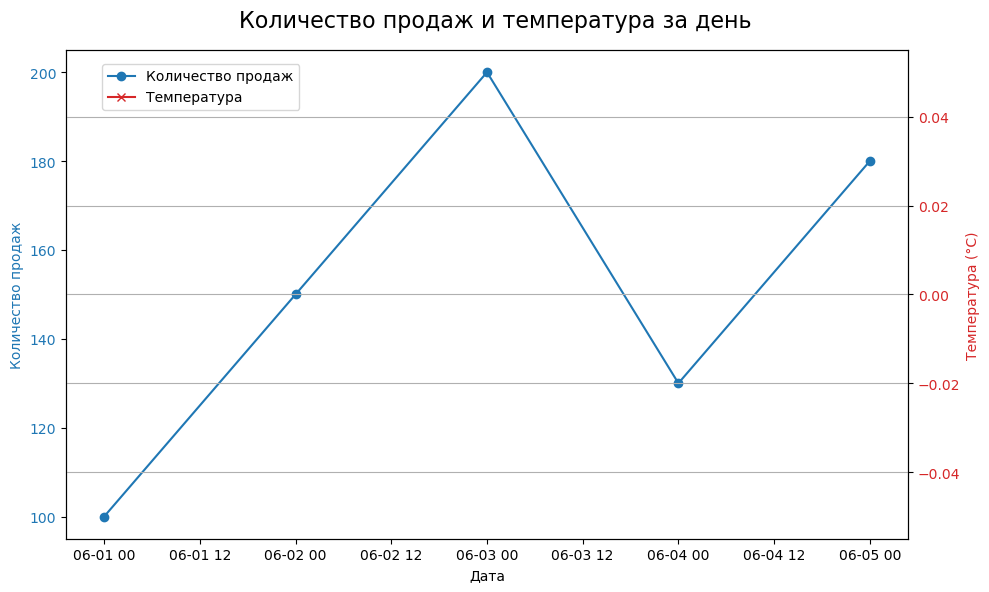

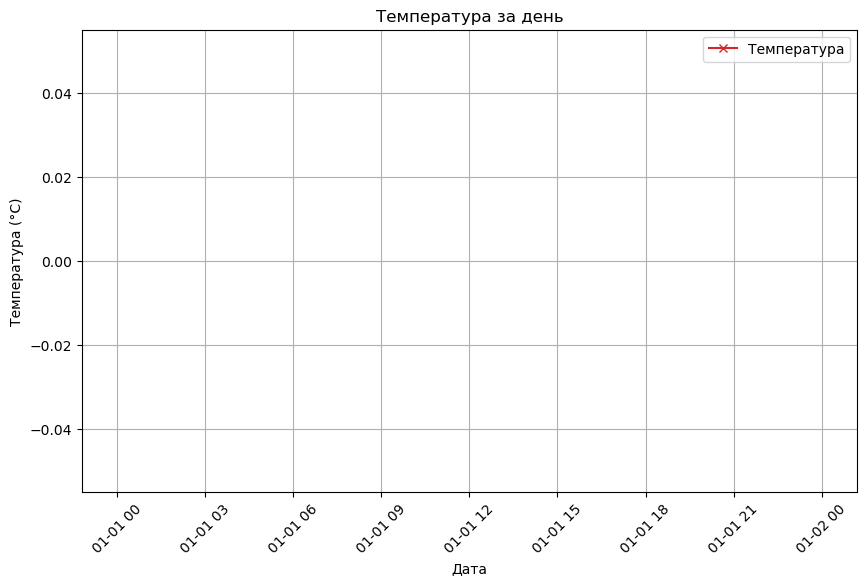

In [161]:
import matplotlib.pyplot as plt

# Создаем график с двумя осями y
fig, ax1 = plt.subplots(figsize=(10, 6))

# График для количества продаж
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='tab:blue')
ax1.plot(merged_df['Дата'], merged_df['Количество продаж'], color='tab:blue', label='Количество продаж', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Создаем вторую ось для температуры
ax2 = ax1.twinx()  
ax2.set_ylabel('Температура (°C)', color='tab:red')
ax2.plot(merged_df['Дата'], merged_df['T'], color='tab:red', label='Температура', marker='x')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Добавляем заголовок и отображаем легенды
fig.suptitle('Количество продаж и температура за день', fontsize=16)
fig.tight_layout()  # Для корректного размещения меток
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Показываем график
plt.xticks(rotation=45)  # Поворачиваем метки по оси X для лучшей читаемости
plt.grid(True)
plt.show()

# Отдельный график для температуры
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Дата'], merged_df['T'], color='tab:red', label='Температура', marker='x')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.title('Температура за день')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()